# <div style="font-family: 'Fira Code'; font-size: 36px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Credit Score </div>

## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Installing and Importing Libraries </div>

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import set_option
import datetime as dt
from scipy import stats as st
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import cluster, metrics

warnings.filterwarnings('ignore')
set_option('display.precision', 3)

## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Reading Datasets </div>

In [127]:
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv')

In [128]:
df_train = train.copy()
df_test = test.copy()

<table style="width:100%">
  <tr>
    <th style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;">Column</th>
    <th style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;">Semantic Meaning</th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Represents a unique identification of an entry</td>
  </tr>
  <tr>
    <td>Customer_ID</td>
    <td>Represents a unique identification of a person</td>
  </tr>
  <tr>
    <td>Month</td>
    <td>Represents the month of the year</td>
  </tr>
    <tr>
    <td>Name</td>
    <td>Represents the name of a person</td>
  </tr>
    <tr>
    <td>Age</td>
    <td>Represents the age of a person</td>
  </tr>
    <tr>
    <td>SSN</td>
    <td>Represents the social security number of a person</td>
  </tr>
    <tr>
    <td>Occupation</td>
    <td>Represents the occupation of the person</td>
  </tr>
    <tr>
    <td>Annual_Income</td>
    <td>Represents the annual income of the person</td>
  </tr>
    <tr>
    <td>Monthly_Inhand_Salary</td>
    <td>Represents the monthly base salary of a person</td>
  </tr>
    <tr>
    <td>Num_Bank_Accounts</td>
    <td>Represents the number of bank accounts a person holds</td>
  </tr>
    <tr>
    <td>Num_Credit_Card</td>
    <td>Represents the number of other credit cards held by a person</td>
  </tr>
    <tr>
    <td>Interest_Rate</td>
    <td>Represents the interest rate on credit card</td>
  </tr>
    <tr>
    <td>Num_of_Loan</td>
    <td>Represents the number of loans taken from the bank</td>
  </tr>
    <tr>
    <td>Type_of_Loan</td>
    <td>Represents the types of loan taken by a person</td>
  </tr>
    <tr>
    <td>Delay_from_due_date</td>
    <td>Represents the average number of days delayed from the payment date</td>
  </tr>
    <tr>
    <td>Num_of_Delayed_Payment</td>
    <td>Represents the average number of payments delayed by a person</td>
  </tr>
  <tr>
    <td>Changed_Credit_Limit</td>
    <td>Represents the percentage change in credit card limit</td>
  </tr>
  <tr>
    <td>Num_Credit_Inquiries</td>
    <td>Represents the number of credit card inquiries</td>
  </tr>
  <tr>
    <td>Credit_Mix</td>
    <td>Represents the classification of the mix of credits</td>
  </tr>
  <tr>
    <td>Outstanding_Debt</td>
    <td>Represents the remaining debt to be paid (in USD)</td>
  </tr>
  <tr>
    <td>Credit_Utilization_Ratio</td>
    <td>Represents the utilization ratio of credit card</td>
  </tr>
  <tr>
    <td>Credit_History_Age</td>
    <td>Represents the age of credit history of the person</td>
  </tr>
  <tr>
    <td>Payment_of_Min_Amount</td>
    <td>Represents whether only the minimum amount was paid by the person</td>
  </tr>
  <tr>
    <td>Total_EMI_per_month</td>
    <td>Represents the monthly EMI payments (in USD)</td>
  </tr>
  <tr>
    <td>Amount_invested_monthly</td>
    <td>Represents the monthly amount invested by the customer (in USD)</td>
  </tr>
  <tr>
    <td>Payment_Behaviour</td>
    <td>Represents the payment behavior of the customer (in USD)</td>
  </tr>
  <tr>
    <td>Monthly_Balance</td>
    <td>Represents the monthly balance amount of the customer (in USD)</td>
  </tr>
  <tr>
    <td>Credit_Score</td>
    <td>Represents the bracket of credit score (Poor, Standard, Good)</td>
  </tr>
</table>

## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Descriptive Analysis </div>

In [129]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Dimensions of data </div>

In [130]:
print(f"dimensions of dataset train: \nlins = {df_train.shape[0]} \ncols = {df_train.shape[1]}\n\n")
print(f"dimensions of dataset test: \nlins = {df_test.shape[0]} \ncols = {df_test.shape[1]}")

dimensions of dataset train: 
lins = 100000 
cols = 28


dimensions of dataset test: 
lins = 50000 
cols = 27


## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Data Type for each attribute </div>

Olhando para o tipo da coluna conseguimos distinguir diferentes tipos de atributos.

In [131]:
print(df_train.dtypes)

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Different values for each attribute </div>

In [132]:
for i in df_train.columns:
    print(f"{i} : {len(df_train[i].value_counts())}")

ID : 100000
Customer_ID : 12500
Month : 8
Name : 10139
Age : 1788
SSN : 12501
Occupation : 16
Annual_Income : 18940
Monthly_Inhand_Salary : 13235
Num_Bank_Accounts : 943
Num_Credit_Card : 1179
Interest_Rate : 1750
Num_of_Loan : 434
Type_of_Loan : 6260
Delay_from_due_date : 73
Num_of_Delayed_Payment : 749
Changed_Credit_Limit : 4384
Num_Credit_Inquiries : 1223
Credit_Mix : 4
Outstanding_Debt : 13178
Credit_Utilization_Ratio : 100000
Credit_History_Age : 404
Payment_of_Min_Amount : 3
Total_EMI_per_month : 14950
Amount_invested_monthly : 91049
Payment_Behaviour : 7
Monthly_Balance : 98792
Credit_Score : 3


## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Cleaning Data </div>

Para facilitar a manipulação dos dados vamos transformar as colunas ID em inteiros sequenciais, ao invés de um objeto.
Também vamos alterar os tipos de algumas colunas para que possamos tratar os dados de acordo com cada tipo de atributo corretamente.

In [133]:
df_train['Customer_ID'] = pd.factorize(df_train['Customer_ID'])[0] + 1
df_train['ID'] = pd.factorize(df_train['ID'])[0] + 1

# type(df_train['Customer_ID'])
# type(df_train['ID'])

cols_int = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
cols_float = ['Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for col in cols_float:
    df_train[col] = df_train[col].apply(lambda x: x if x is np.nan or not isinstance(x, str) else x.replace("_", "")).replace("", np.nan)
    df_train[col] = df_train[col].astype(np.float64)

for col in cols_int:
    df_train[col] = df_train[col].apply(lambda x: x if x is np.nan or not isinstance(x, str) else x.replace("_", ""))
    df_train[col] = df_train[col].fillna(0).astype(np.int64)

In [134]:
df_train.dtypes

ID                            int64
Customer_ID                   int64
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [135]:
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,1,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.415,High_spent_Small_value_payments,312.494,Good
1,2,1,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.945,NaN,No,49.575,118.280,Low_spent_Large_value_payments,284.629,Good
2,3,1,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.700,Low_spent_Medium_value_payments,331.210,Good
3,4,1,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.458,Low_spent_Small_value_payments,223.451,Good
4,5,1,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,...,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420,High_spent_Medium_value_payments,341.489,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,12500,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.971,High_spent_Large_value_payments,479.866,Poor
99996,99997,12500,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.186,High_spent_Medium_value_payments,496.652,Poor
99997,99998,12500,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.028,High_spent_Large_value_payments,516.809,Poor
99998,99999,12500,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,...,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.673,Low_spent_Large_value_payments,319.165,Standard


Algo que podemos utilizar como ajuste é verificar quais os valores das variáveis categóricas numéricas e nominais para que possamos excluir possíveis outliers, ou variáveis que contem poucos valores distintos, que de primeiro momento fica mais simples a remoção dos outliers. Para isso podemos voltar e olhar para a quantidade de valores distintos para cada atributo.

De primeiro momento, vamos analisar:
- Month
- Occupation
- Credit_Mix
- Payment_of_Min_Amount
- Payment_Behaviour
- Credit_Score

In [136]:
cols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

for col in cols:
    print(f"{df_train[col].value_counts()}\n\n")

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9

Observamos que a unica coluna categórica que possui um valor muito descrepante de primeiro momento e que não será possível inferir algo é a coluna 'Payment_Behavior', desta forma a melhor alternativa será a remoção das tuplas que possuem esses outliers.

In [137]:
index_outliers_payment_behaviour = df_train[df_train["Payment_Behaviour"] == "!@9#%8"].index
df_train.loc[index_outliers_payment_behaviour, "Payment_Behaviour"] = np.nan
df_train = df_train[-df_train["Payment_Behaviour"].isna()]
df_train["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;">  NULL Values </div>

In [138]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9240
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13842
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10520
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit         1942
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8341
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4132
Payment_Behaviour               0
Monthly_Balance              1105
Credit_Score                    0
dtype: int64

In [139]:
columns_null_categories = ['Monthly_Inhand_Salary', 'Name', 'Amount_invested_monthly', 'Num_Credit_Inquiries', 'Monthly_Balance']

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;">  Removing NULL Values using mode </div>

In [140]:
most_frequent_values = df_train.groupby('Customer_ID')['Name'].apply(lambda x: x.dropna().value_counts().idxmax() if not x.dropna().empty else None)
df_train.loc[df_train['Name'].isnull(), 'Name'] = df_train[df_train['Name'].isnull()].apply(lambda row: most_frequent_values[row['Customer_ID']] if pd.isnull(row['Name']) else row['Name'], axis=1)
df_train = df_train[-df_train["Name"].isna()]

In [141]:
most_frequent_values_02 = df_train.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.dropna().value_counts().idxmax() if not x.dropna().empty else None)
df_train.loc[df_train['Monthly_Inhand_Salary'].isnull(), 'Monthly_Inhand_Salary'] = df_train[df_train['Monthly_Inhand_Salary'].isnull()].apply(lambda row: most_frequent_values_02[row['Customer_ID']] if pd.isnull(row['Monthly_Inhand_Salary']) else row['Monthly_Inhand_Salary'], axis=1)

Podemos notar que a coluna Customer_ID não possui valores nulos, o que da a possibilidade caso para esse id possuimos um valor do campo nulo anteriormente podemos preencher com o valor que temos, então vamos utilizar a coluna Customer_ID para iniciar o preenchimento de valores nulos de acordo com cada attributo presente em outras tuplas.

Em seguida vamos tratar valores inesperados como "_______" na coluna "Occupation", ou valores que pudermos verificar se existe um valor que represente a moda pelo ID da mesma forma dos valores nulos.

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;">  Removing NULL Values using mean </div>

In [142]:
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    if col in ['Amount_invested_monthly']:
        df_train.loc[df_train[col] == 10000.0, col] = np.nan # Tratando os valores 10k que são valores aleatorios, para substituir pela média e Valor investido no mês negativo
    index = df_train[(df_train[col] < 0)].index
    df_train.loc[index, col] = np.nan
    aux = df_train.groupby("Customer_ID")[col].transform(lambda x:x.median())
    df_train[col].fillna(aux, inplace=True)

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Removing discrepant Values using mode </div>


In [143]:
for ID in df_train[df_train['Occupation'] == "_______"]['Customer_ID'] :
    oc = df_train[df_train['Customer_ID'] == ID]['Occupation'].mode()[0]
    df_train[df_train['Customer_ID'] == ID] = df_train[df_train['Customer_ID'] == ID].replace("_______", oc)

index_oc_nan = df_train[df_train['Occupation'] == "_______"].index
df_train = df_train.drop(index_oc_nan)

In [144]:
cols=["Age", "Annual_Income", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Monthly_Inhand_Salary", "Changed_Credit_Limit", "Outstanding_Debt","Total_EMI_per_month"]

for col in cols:
    index = df_train[ df_train[col] < 0 ].index
    df_train.loc[index, col] = np.nan
    df = df_train[-df_train[col].isna()]
    aux = df.groupby("Customer_ID")[col].agg(st.mode, keepdims=True).apply(lambda x:x[0][0])
    df_train.drop(col, axis=1, inplace=True)
    df_train=pd.merge(left=df_train, right=aux, how="left", left_on="Customer_ID", right_index=True)

In [145]:
aux = df_train.groupby("Customer_ID")["SSN"].agg(st.mode, keepdims=True).apply(lambda x:x[0][0])
df_train.drop("SSN", axis=1, inplace=True)
df_train=pd.merge(left=df_train,right=aux,how="left",left_on="Customer_ID",right_index=True)
drop_outliers_ssn = df_train[df_train["SSN"] == "#F%$D@*&8"].index
df_train.drop(drop_outliers_ssn, inplace=True)

In [146]:
for i in df_train.columns:
    print(f"{df_train[i].value_counts()}\n\n")

1        1
66645    1
66643    1
66642    1
66641    1
        ..
33259    1
33258    1
33257    1
33256    1
99999    1
Name: ID, Length: 92309, dtype: int64


6246    8
9831    8
9813    8
9815    8
9817    8
       ..
6525    3
8425    2
9441    2
9585    2
9753    1
Name: Customer_ID, Length: 12491, dtype: int64


July        11573
February    11567
January     11566
March       11539
June        11532
April       11519
May         11519
August      11494
Name: Month, dtype: int64


Stevex            47
Jessicad          42
Langep            42
Raymondr          40
env               39
                  ..
David Fogartyn     3
Vignaln            3
Marias             3
"Martinf           2
akumar Johnp       1
Name: Name, Length: 10135, dtype: int64


Lawyer           6561
Engineer         6345
Architect        6303
Mechanic         6249
Accountant       6231
Scientist        6215
Teacher          6191
Media_Manager    6191
Entrepreneur     6177
Developer        6156
Doctor         

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Turning nominal categorical variables into numerals and normalizing big values</div>


In [147]:
dict_payment_of_min_amount = {
    "Yes" : 1,
    "No" : 0,
    "NM" : 2
}

df_train["Payment_of_Min_Amount"] = df_train["Payment_of_Min_Amount"].map(dict_payment_of_min_amount)

In [148]:
dict_credit_mix = {
    "_" : 0,
    "Bad" : 1,
    "Standard" : 2,
    "Good" : 3
}

df_train["Credit_Mix"] = df_train["Credit_Mix"].map(dict_credit_mix)

In [149]:
dict_credit_score = {
    "Poor" : 1,
    "Standard" : 2,
    "Good" : 3
}

df_train["Credit_Score"] = df_train["Credit_Score"].map(dict_credit_score)

In [150]:
dict_month = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8
}

df_train["Month"] = df_train["Month"].map(dict_month)

In [151]:
df_train.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Occupation                   object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Num_Credit_Inquiries          int64
Credit_Mix                    int64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount         int64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
Age                         float64
Annual_Income               float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Monthly_Inhand_Salary       float64
Changed_Credit_Limit        float64
Outstanding_Debt            float64
Total_EMI_per_month         float64
SSN                         

In [152]:
df_numerics_values = df_train.select_dtypes(include=['int64', 'float64'])

In [153]:
df_numerics_values.describe()

,ID,Customer_ID,Month,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,...,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000
mean,49968.091,6246.449,4.497,21.067,28.961,27.324,1.649,32.286,0.764,193.714,...,33.286,50510.376,5.364,5.532,14.530,3.528,4199.247,10.399,1425.574,105.876
std,28881.320,3610.165,2.292,14.879,219.741,192.194,1.058,5.118,0.649,194.602,...,10.761,38318.313,2.594,2.068,8.747,2.443,3189.081,6.509,1154.489,127.356
min,1.000,1.000,1.000,-5.000,-3.000,0.000,0.000,20.000,0.000,0.000,...,14.000,7005.930,0.000,0.000,1.000,0.000,303.645,0.500,0.230,0.000
25%,24905.000,3114.000,2.000,10.000,8.000,3.000,1.000,28.055,0.000,73.754,...,24.000,19307.900,3.000,4.000,7.000,2.000,1625.598,5.500,566.050,29.046
50%,49926.000,6241.000,4.000,18.000,13.000,5.000,2.000,32.304,1.000,129.569,...,33.000,36993.430,5.000,5.000,13.000,3.000,3091.261,9.360,1164.890,66.063
75%,75002.000,9376.000,6.000,28.000,18.000,9.000,2.000,36.497,1.000,234.580,...,42.000,71716.600,7.000,7.000,20.000,5.000,5968.177,14.680,1945.670,145.640
max,99999.000,12500.000,8.000,67.000,4397.000,2597.000,3.000,50.000,2.000,1977.326,...,56.000,179987.280,10.000,11.000,34.000,9.000,15204.633,29.980,4998.070,1779.103


In [154]:
df_train.describe()

,ID,Customer_ID,Month,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Payment_of_Min_Amount,Amount_invested_monthly,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,...,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000,92309.000
mean,49968.091,6246.449,4.497,21.067,28.961,27.324,1.649,32.286,0.764,193.714,...,33.286,50510.376,5.364,5.532,14.530,3.528,4199.247,10.399,1425.574,105.876
std,28881.320,3610.165,2.292,14.879,219.741,192.194,1.058,5.118,0.649,194.602,...,10.761,38318.313,2.594,2.068,8.747,2.443,3189.081,6.509,1154.489,127.356
min,1.000,1.000,1.000,-5.000,-3.000,0.000,0.000,20.000,0.000,0.000,...,14.000,7005.930,0.000,0.000,1.000,0.000,303.645,0.500,0.230,0.000
25%,24905.000,3114.000,2.000,10.000,8.000,3.000,1.000,28.055,0.000,73.754,...,24.000,19307.900,3.000,4.000,7.000,2.000,1625.598,5.500,566.050,29.046
50%,49926.000,6241.000,4.000,18.000,13.000,5.000,2.000,32.304,1.000,129.569,...,33.000,36993.430,5.000,5.000,13.000,3.000,3091.261,9.360,1164.890,66.063
75%,75002.000,9376.000,6.000,28.000,18.000,9.000,2.000,36.497,1.000,234.580,...,42.000,71716.600,7.000,7.000,20.000,5.000,5968.177,14.680,1945.670,145.640
max,99999.000,12500.000,8.000,67.000,4397.000,2597.000,3.000,50.000,2.000,1977.326,...,56.000,179987.280,10.000,11.000,34.000,9.000,15204.633,29.980,4998.070,1779.103


## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Data Vizualization for clean </div>

O Intuito desta vizualização é encontrar alguns outliers e removê-los vamos investigar as colunas que apresentam muita discrepância dos seus percentils, também estamos olhando para o desvio padrão, como ponto de apoio.

In [155]:
def plotting_boxplot(df, fig, column, title, ylabel, xlabel, y_ticks):
    f, ax = plt.subplots(figsize=fig)
    ax.boxplot(df[column])
    ax.set_yticks(y_ticks)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()

def plotting_bar(df, fig, column, title, ylabel, xlabel, y_ticks):
    f, ax = plt.subplots(figsize=fig)
    count_columns = df[column].value_counts()
    ax.bar(count_columns.index, count_columns.values)
    ax.set_xticks(count_columns.index)

    for i in range(len(count_columns.index)):
        ax.text(i, count_columns.values[i], count_columns.values[i], ha = 'center', va='top')

    ax.set_yticks(y_ticks)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

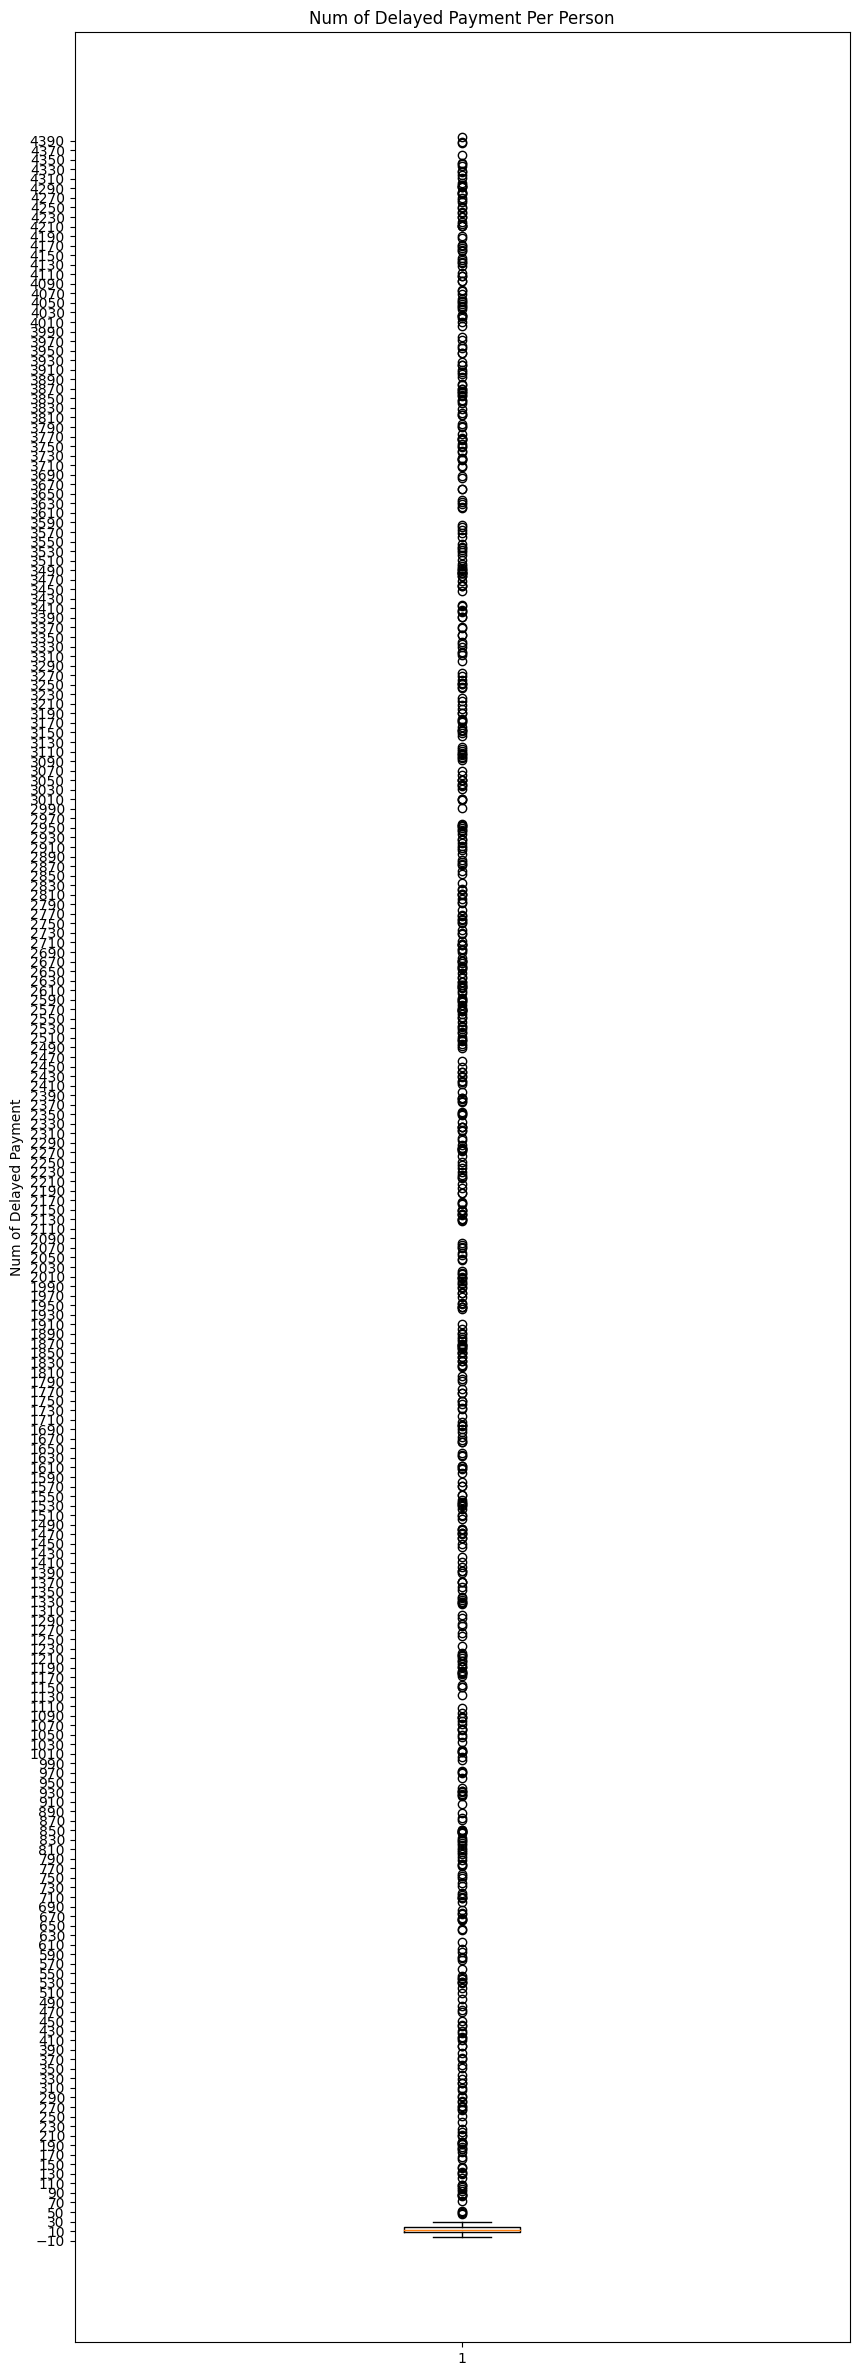

In [156]:
plotting_boxplot(df_numerics_values, (10, 30), "Num_of_Delayed_Payment", "Num of Delayed Payment Per Person", "Num of Delayed Payment", "", np.arange(-10, 4400, 20))
# plotting_bar(df_numerics_values, (10, 6), "Num_of_Delayed_Payment", "title", "ylabel", "xlabel", np.arange(0, 10, 1))

Buscando uma melhor otimização do nosso estudo, decidimos por remover valores muito acima de 30 da coluna "Num_of_Delayed_Payment", o que representa apenas, 0.75% da nossa amostra.

In [157]:
len(df_train[df_train["Num_of_Delayed_Payment"] >= 30]) / len(df_train) * 100

0.7420728206350411

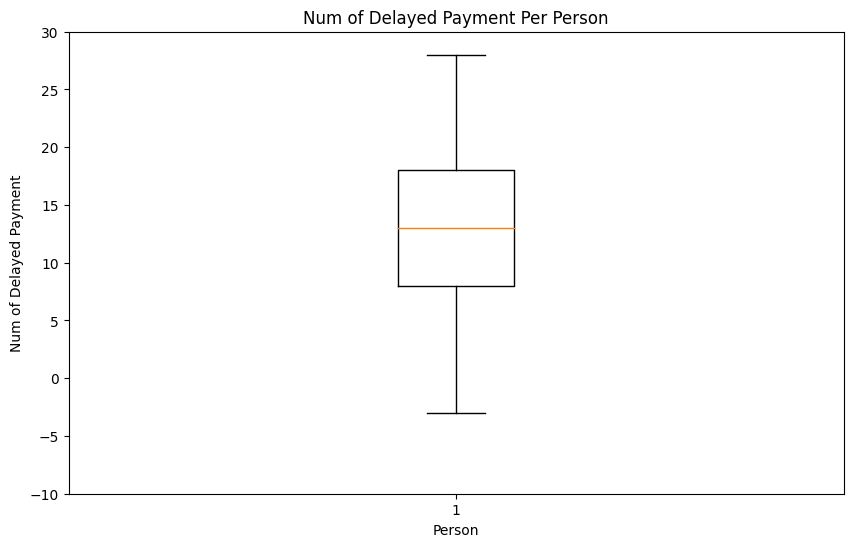

In [158]:
outliers_num_of_payment = df_train[df_train["Num_of_Delayed_Payment"] >= 30].index
df_train.drop(outliers_num_of_payment, inplace=True)
plotting_boxplot(df_train, (10, 6), "Num_of_Delayed_Payment", "Num of Delayed Payment Per Person", "Num of Delayed Payment", "Person", np.arange(-10, 35, 5))

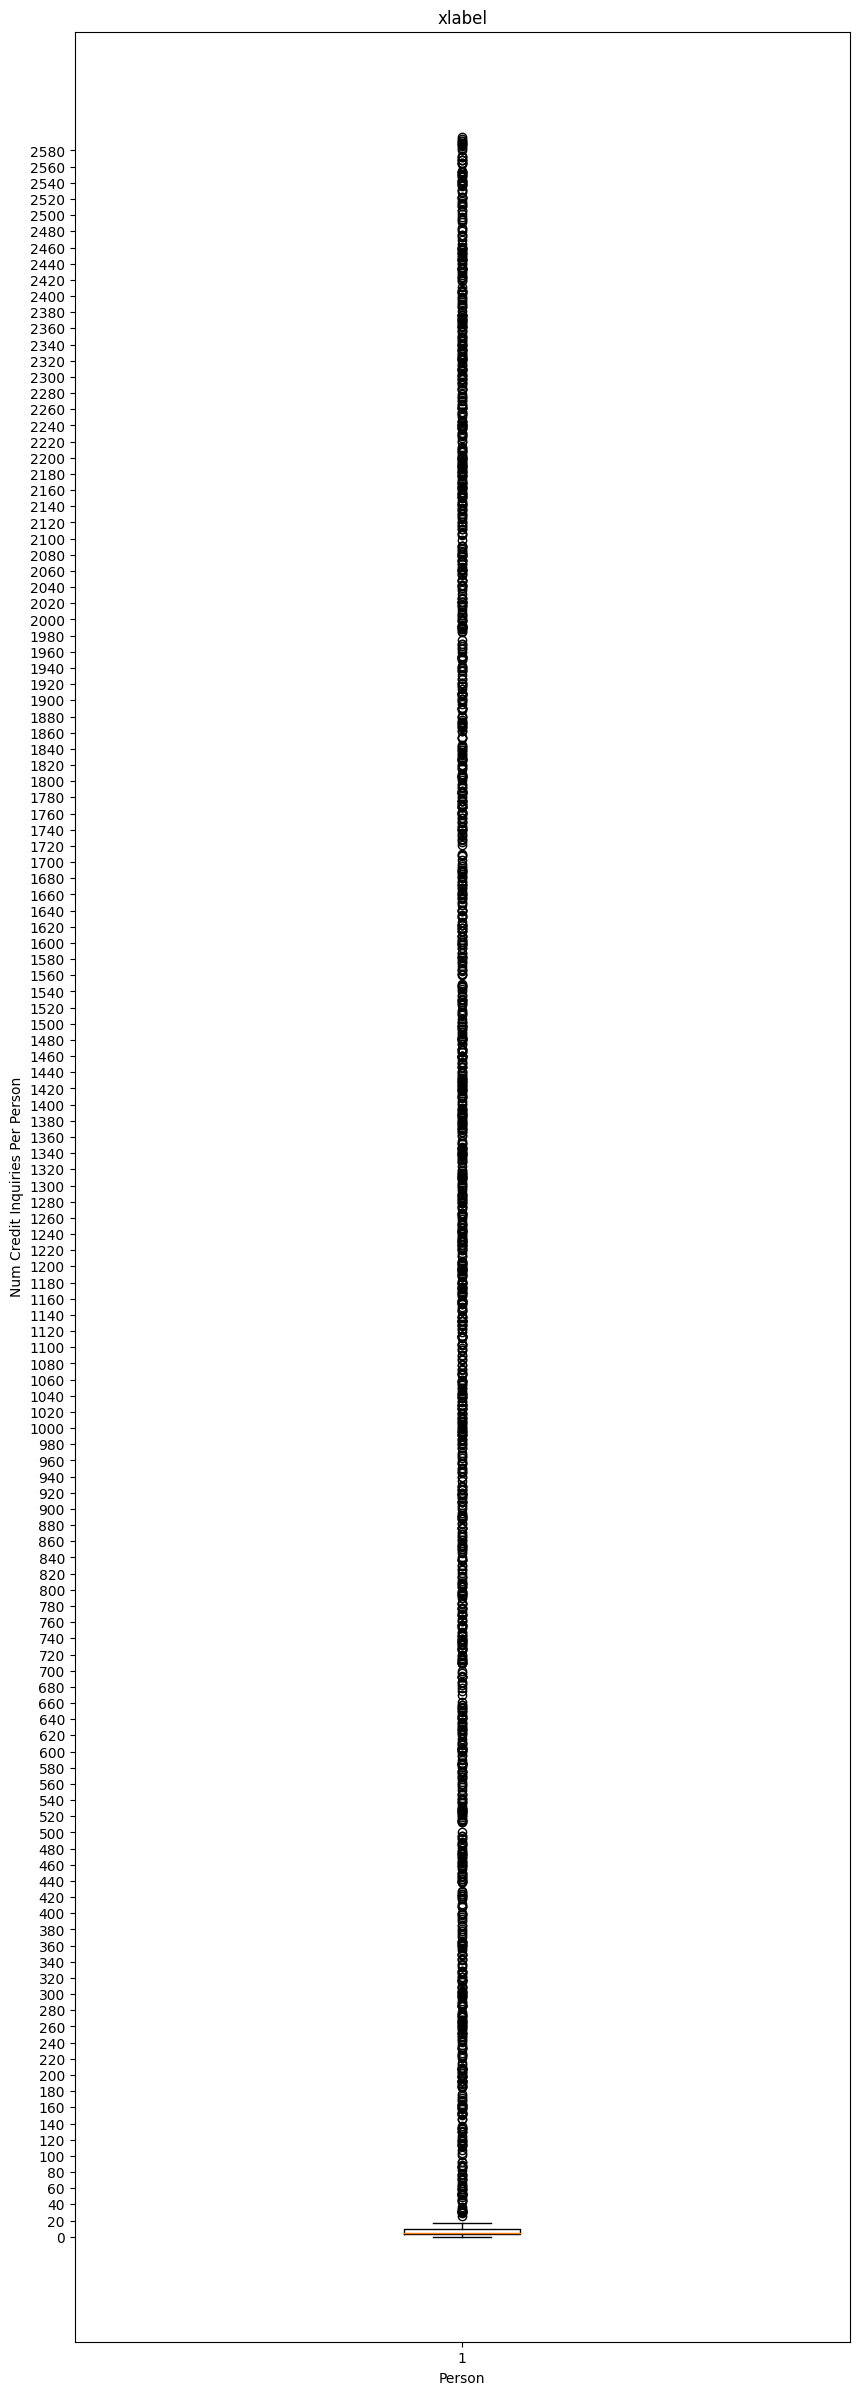

In [159]:
plotting_boxplot(df_numerics_values, (10, 30), "Num_Credit_Inquiries", "xlabel", "Num Credit Inquiries Per Person", "Person", np.arange(0, 2600, 20))

In [160]:
len(df_train[df_train["Num_Credit_Inquiries"] >= 30])

1515

In [161]:
len(df_train[df_train["Num_Credit_Inquiries"] >= 30]) / len(df_train) * 100

1.6534969003754476

Visto que valores acima de 30 consultas por cartões de crédito representa somente 1.65% da nossa amostra optamos por retirar também para manter os valores mais limpos. Faremos o mesmo para as próximas colunas analisadas

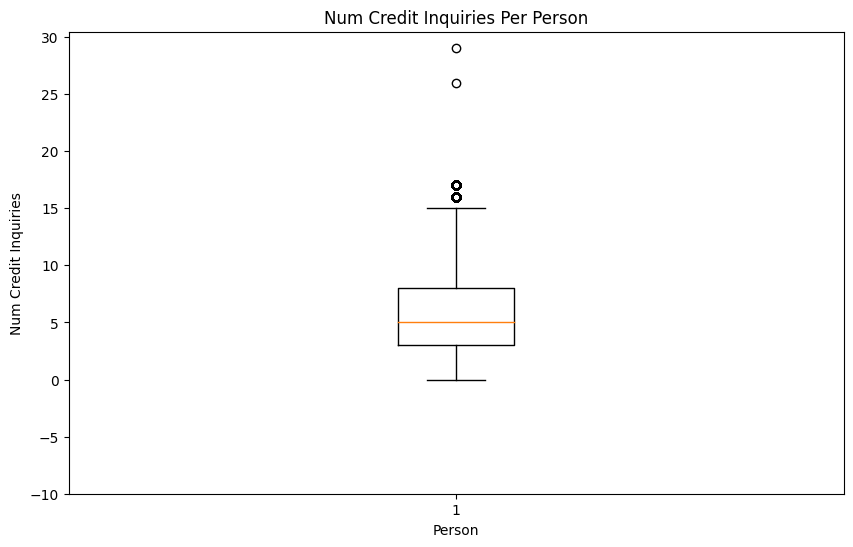

In [162]:
outliers_num_credit_inquiries = df_train[df_train["Num_Credit_Inquiries"] >= 30].index
df_train.drop(outliers_num_credit_inquiries, inplace=True)
plotting_boxplot(df_train, (10, 6), "Num_Credit_Inquiries", "Num Credit Inquiries Per Person", "Num Credit Inquiries", "Person", np.arange(-10, 35, 5))

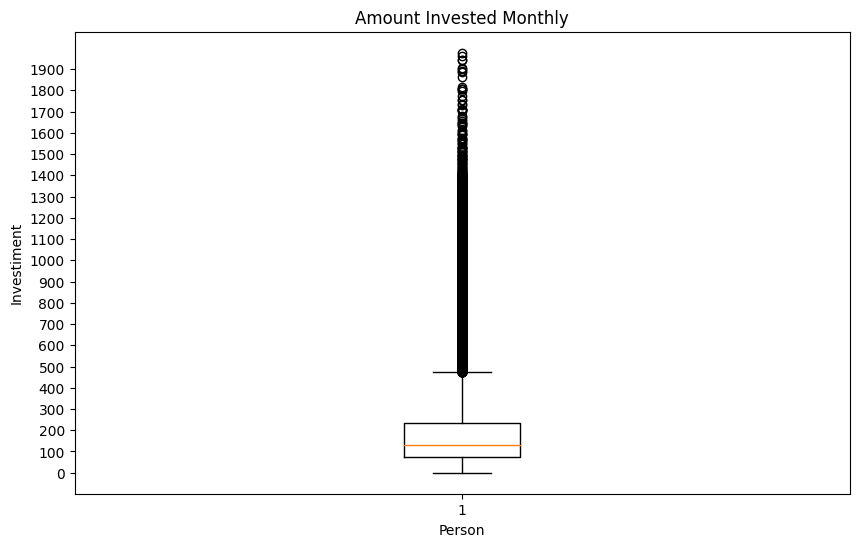

In [163]:
plotting_boxplot(df_train, (10, 6), "Amount_invested_monthly", "Amount Invested Monthly", "Investiment", "Person", np.arange(0, 1978.000, 100))

Optamos por remover acima de 1500 pois o gráfico mostra que os valores começam a ficar mais espersos acima deste valor, a amostra removida representa apenas 0.08% da nossa amostra.

In [164]:
len(df_train[df_train["Amount_invested_monthly"] >= 1400]) / len(df_train) * 100

0.10764740480973044

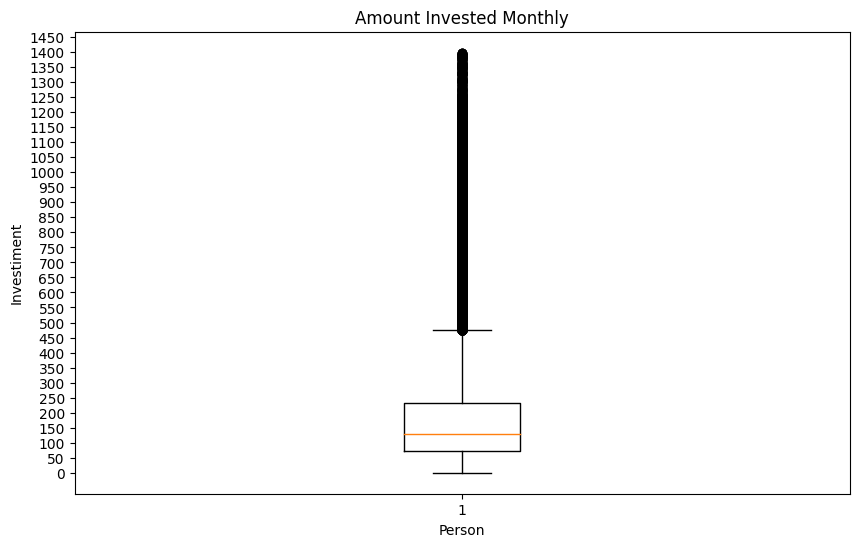

In [165]:
outliers_amount_invested_monthly = df_train[df_train["Amount_invested_monthly"] >= 1400].index
df_train.drop(outliers_amount_invested_monthly, inplace=True)
plotting_boxplot(df_train, (10, 6), "Amount_invested_monthly", "Amount Invested Monthly", "Investiment", "Person", np.arange(0, 1500.000, 50))

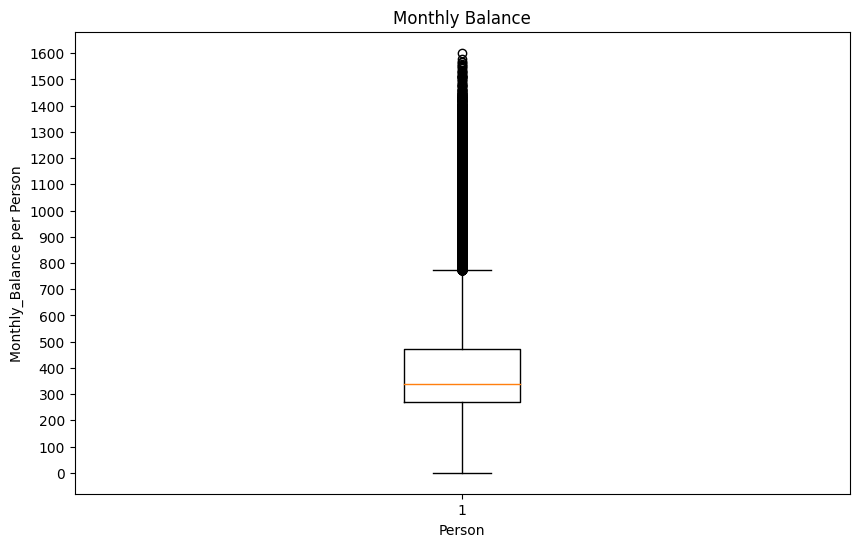

In [166]:
plotting_boxplot(df_train, (10, 6), "Monthly_Balance", "Monthly Balance", "Monthly_Balance per Person", "Person", np.arange(0, 1700.000, 100))

In [167]:
len(df_train[df_train["Monthly_Balance"] >= 1400]) / len(df_train) * 100

0.10331955739234769

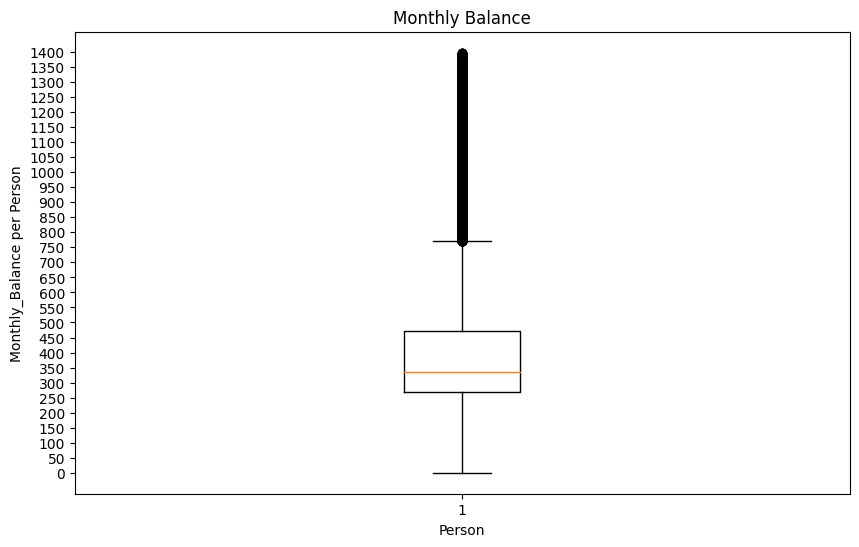

In [168]:
outliers_monthly_balance = df_train[df_train["Monthly_Balance"] >= 1400].index
df_train.drop(outliers_monthly_balance, inplace=True)
plotting_boxplot(df_train, (10, 6), "Monthly_Balance", "Monthly Balance", "Monthly_Balance per Person", "Person", np.arange(0, 1450.000, 50))

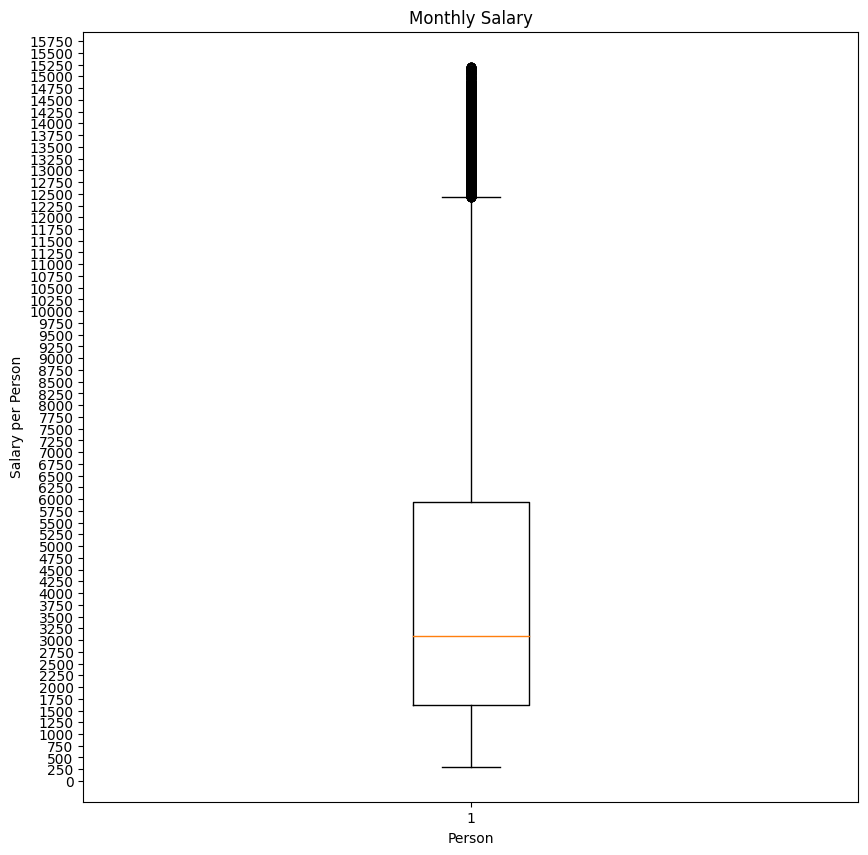

In [169]:
plotting_boxplot(df_train, (10, 10), "Monthly_Inhand_Salary", "Monthly Salary", "Salary per Person", "Person", np.arange(0, 16000, 250))

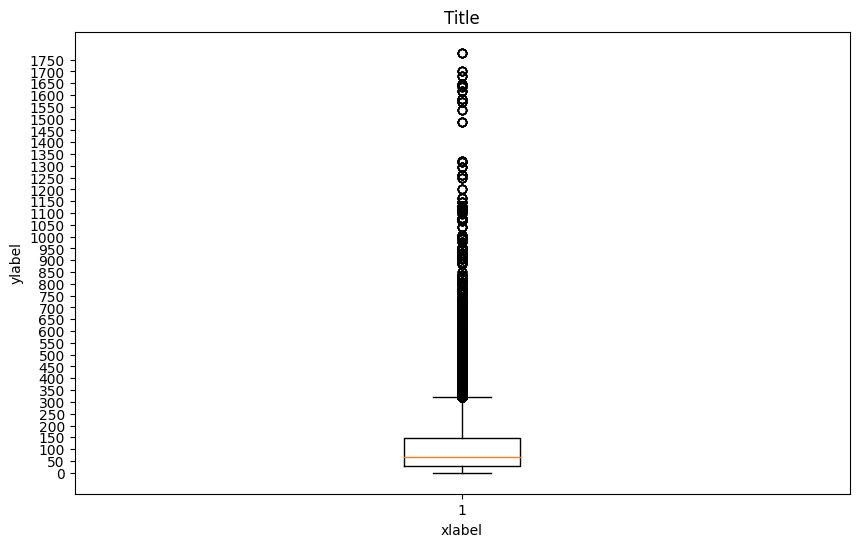

In [170]:
plotting_boxplot(df_train, (10, 6), "Total_EMI_per_month", "Title", "ylabel", "xlabel", np.arange(0, 1800, 50))

In [171]:
len(df_train[df_train["Total_EMI_per_month"] >= 850]) / len(df_train) * 100

0.36588485192228565

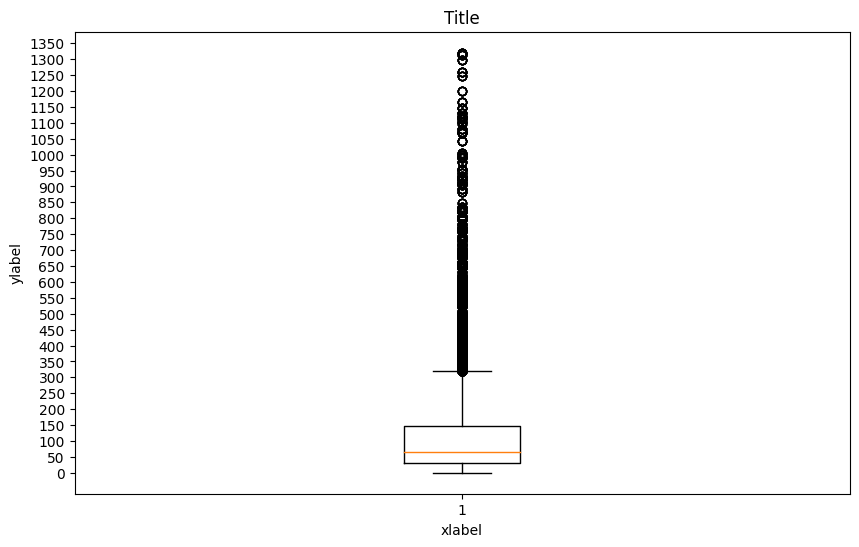

In [172]:
outliers_Total_EMI_per_month = df_train[df_train["Total_EMI_per_month"] >= 1350].index
df_train.drop(outliers_Total_EMI_per_month, inplace=True)
plotting_boxplot(df_train, (10, 6), "Total_EMI_per_month", "Title", "ylabel", "xlabel", np.arange(0, 1400, 50))

In [173]:
df_numerics_values = df_train.select_dtypes(include=['int64', 'float64'])
df_numerics_values.drop(columns=['ID', 'Customer_ID'], inplace=True)

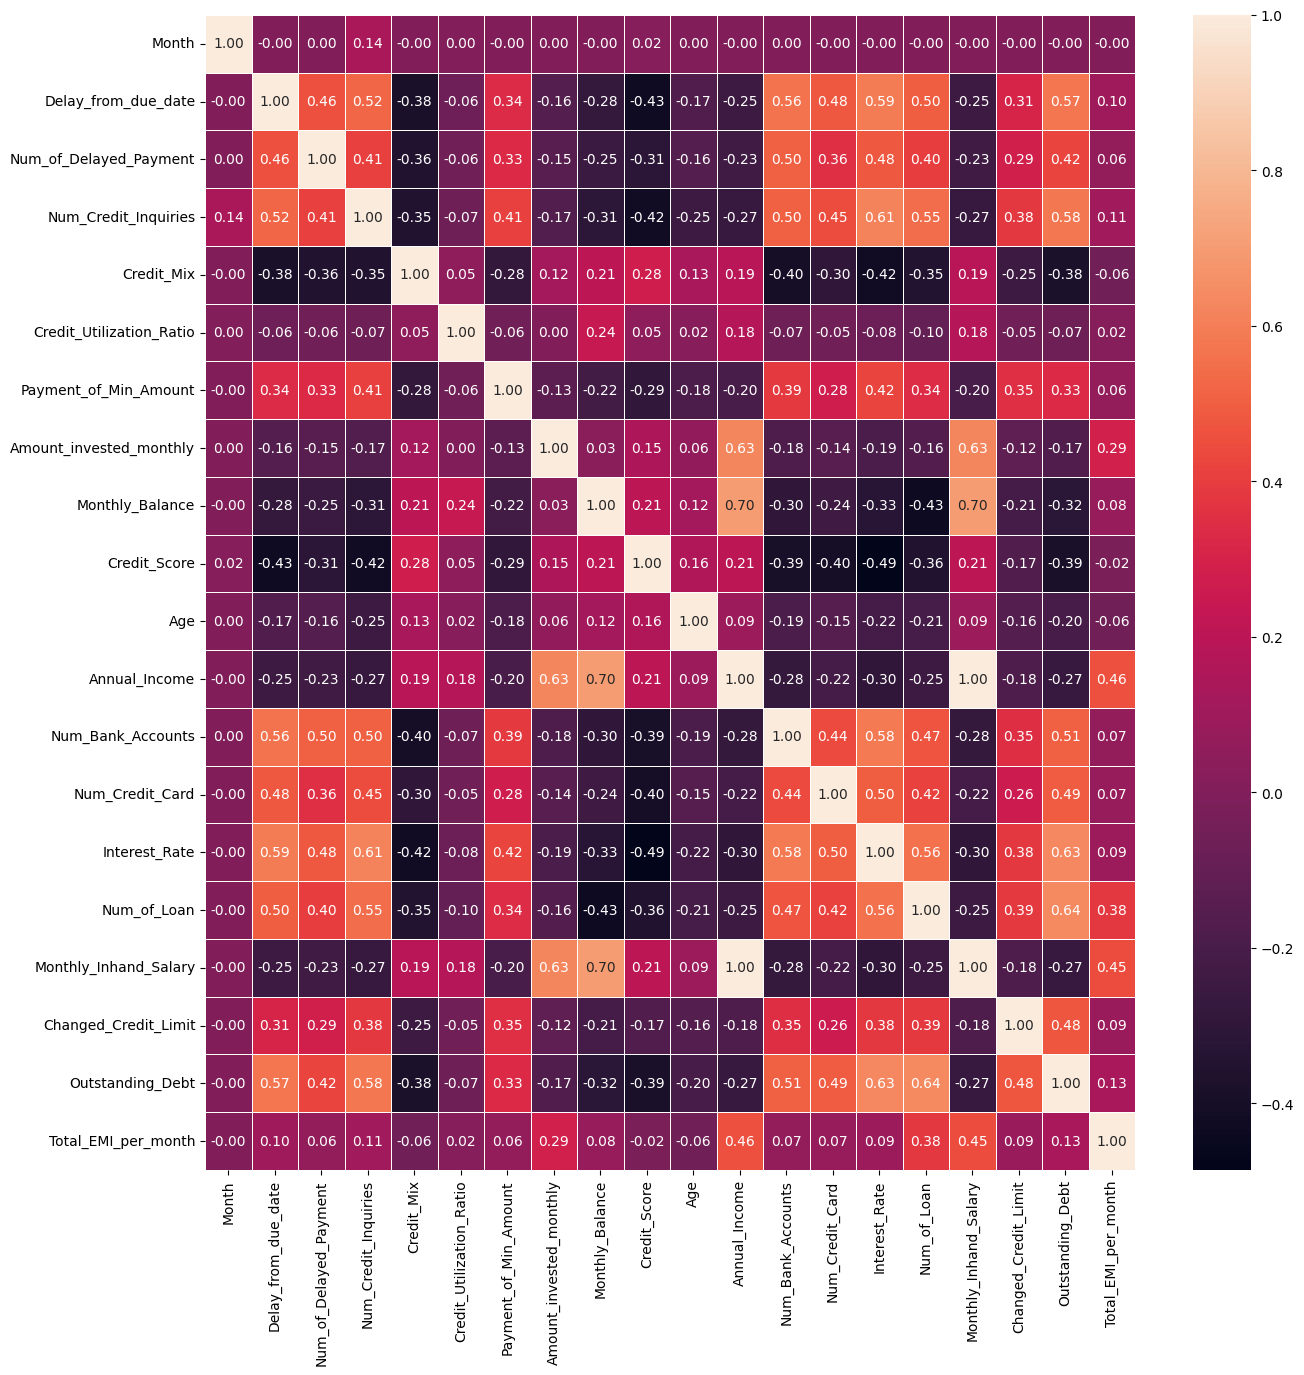

In [174]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_numerics_values.corr(method='pearson'), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
plt.savefig("./corr_pearson.png")

Podemos observar de primeiro momento algumas correlações já esperadas onde, as colunas: **Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries** possuem uma correlação positiva bsendo uma das mais notáveis, com as colunas relacionadas emprestimos, como as colunas **Num_Bank_Accounts, Num_of_Loan, Interest_Rate**. Também podemos notar que da mesma forma, que as colunas **Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries**, possuem uma correlação negativa bem chamativa com os atributos como **Amount_invested_monthly, Monthly_Balance, Annual_Income, Age**, o que faz total sentido.

Uma curiosidade é que os dados mostram de primeiro momento é que pessoas mais velhas tem mais chances de conseguirem uma boa educação financeira, reafirmando uma das hipóteses iniciais discutidas com minha dupla de estudo.

Por outro lado, **Annual_Income**, por exemplo, tem uma correlação bastante positiva com quem geralmente investe, possui um balanceamento mensal positivo, um menor número de contas em bancos, além de também manter uma relação bem distante de indicativos negativos como empréstimos e interesse em créditos.

Outra curiosidade é que conseguimos perceber também que quem geralmente consegue sair de uma dívida, ao invés de procurar ir atrás de investir, a pessoa continua pagando o minimo, e vai atrás de mais crédito, mais cartões, e consequentemente começa atrasar os pagamentos novamente entrando e mais dívidas, isso mostra um pouco do hábito das pessoas. Então pressupõe que esse perfil seria um perfil adequado para ganhar mais crédito, visando o lucro do branco.

In [175]:
df_train

,ID,Customer_ID,Month,Name,Occupation,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,SSN
0,1,1,1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4,0,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
1,2,1,2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
2,3,1,3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
3,4,1,4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
4,5,1,5,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,0,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,Nicks,Mechanic,"Auto Loan, and Student Loan",20,6,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99995,99996,12500,4,Nicks,Mechanic,"Auto Loan, and Student Loan",23,7,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99996,99997,12500,5,Nicks,Mechanic,"Auto Loan, and Student Loan",18,7,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99997,99998,12500,6,Nicks,Mechanic,"Auto Loan, and Student Loan",27,6,3,3,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990


## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Initial evaluations and analysis of results </div>

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Data Organization and Cleaning </div>

In [176]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Occupation', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Age', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Total_EMI_per_month', 'SSN'],
      dtype='object')

In [177]:
# df_nulls = df_train[df_train.isnull().any(axis=1)]
# df_nulls

tuples_nulls = df_train[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Total_EMI_per_month']].isna().any(axis=1)

In [178]:
df_train[tuples_nulls]

,ID,Customer_ID,Month,Name,Occupation,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,SSN


Como podemos ver não possuímos valores nulos nas variáveis numericas

In [179]:
print(df_train.shape)

(89843, 28)


In [180]:
def history_age(age):
    try:
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except:
        return np.nan

In [181]:
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(history_age)

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Softening the noises, with new columns</div>

Vizualizando os valores pelos boxplots, nota-se a necessidade de suavizar os dados para não perder os dados simplesmente eliminando, assim facilita o trabalho, do que utilizando valores maiores, vamos primeiro discretizar algumas colunas que julgamos necessário.

In [182]:
df_train

,ID,Customer_ID,Month,Name,Occupation,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,SSN
0,1,1,1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4,0,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
1,2,1,2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,0,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
2,3,1,3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
3,4,1,4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
4,5,1,5,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,0,4,3,...,19114.12,3.0,4.0,3.0,4.0,1824.843,11.27,809.98,49.575,821-00-0265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,Nicks,Mechanic,"Auto Loan, and Student Loan",20,6,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99995,99996,12500,4,Nicks,Mechanic,"Auto Loan, and Student Loan",23,7,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99996,99997,12500,5,Nicks,Mechanic,"Auto Loan, and Student Loan",18,7,3,0,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990
99997,99998,12500,6,Nicks,Mechanic,"Auto Loan, and Student Loan",27,6,3,3,...,39628.99,4.0,6.0,7.0,2.0,3359.416,11.50,502.38,35.104,078-73-5990


In [183]:
df_train["Type_of_Loan"].value_counts()

Not Specified                                                                                                                                         1275
Credit-Builder Loan                                                                                                                                   1140
Personal Loan                                                                                                                                         1137
Student Loan                                                                                                                                          1128
Debt Consolidation Loan                                                                                                                               1120
                                                                                                                                                      ... 
Not Specified, Mortgage Loan, Student Loan, Student Loan, Student Loan

In [184]:
list_of_loan = []

for _, row in df_train.iterrows():
    a = str(row["Type_of_Loan"])
    load_types = a.replace("and", ",").split(",")
    for loan_type in load_types:
        new_value = loan_type.strip()
        if loan_type.strip() not in list_of_loan:
            list_of_loan.append(new_value)


In [185]:
list_of_loan = [value for value in list_of_loan if value not in ['', 'nan']]

In [186]:
list_of_loan

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Not Specified',
 'Mortgage Loan',
 'Student Loan',
 'Debt Consolidation Loan',
 'Payday Loan']

In [187]:
def codifying_loan(df, list_of_loan):

    # Cria colunas binárias para cada tipo de empréstimo
    for loantype in list_of_loan:
        column_name = 'Type_of_Loan' + "_" + loantype.title().replace(' ', '_')
        df[column_name] = df['Type_of_Loan'].apply(lambda x: 1 if (str(x).find(loantype) != -1) else 0)

    # Remove a coluna original "Type_of_Loan"
    df.drop('Type_of_Loan', axis=1, inplace=True)

    return df

In [188]:
codifying_loan(df_train, list_of_loan)

,ID,Customer_ID,Month,Name,Occupation,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,...,SSN,Type_of_Loan_Auto_Loan,Type_of_Loan_Credit-Builder_Loan,Type_of_Loan_Personal_Loan,Type_of_Loan_Home_Equity_Loan,Type_of_Loan_Not_Specified,Type_of_Loan_Mortgage_Loan,Type_of_Loan_Student_Loan,Type_of_Loan_Debt_Consolidation_Loan,Type_of_Loan_Payday_Loan
0,1,1,1,Aaron Maashoh,Scientist,3,7,4,0,26.823,...,821-00-0265,1,1,1,1,0,0,0,0,0
1,2,1,2,Aaron Maashoh,Scientist,-1,0,4,3,31.945,...,821-00-0265,1,1,1,1,0,0,0,0,0
2,3,1,3,Aaron Maashoh,Scientist,3,7,4,3,28.609,...,821-00-0265,1,1,1,1,0,0,0,0,0
3,4,1,4,Aaron Maashoh,Scientist,5,4,4,3,31.378,...,821-00-0265,1,1,1,1,0,0,0,0,0
4,5,1,5,Aaron Maashoh,Scientist,6,0,4,3,24.797,...,821-00-0265,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,Nicks,Mechanic,20,6,3,0,39.324,...,078-73-5990,1,0,0,0,0,0,1,0,0
99995,99996,12500,4,Nicks,Mechanic,23,7,3,0,34.664,...,078-73-5990,1,0,0,0,0,0,1,0,0
99996,99997,12500,5,Nicks,Mechanic,18,7,3,0,40.566,...,078-73-5990,1,0,0,0,0,0,1,0,0
99997,99998,12500,6,Nicks,Mechanic,27,6,3,3,41.256,...,078-73-5990,1,0,0,0,0,0,1,0,0


In [189]:
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].astype(str)

In [190]:
dict_pb = {
    "Low_spent_Small_value_payments" : 1,
    "Low_spent_Medium_value_payments" : 2,
    "Low_spent_Large_value_payments" : 3,
    "High_spent_Small_value_payments" : 4,
    "High_spent_Medium_value_payments" : 5,
    "High_spent_Large_value_payments" : 6
}

df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].map(dict_pb)
df_train

,ID,Customer_ID,Month,Name,Occupation,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,...,SSN,Type_of_Loan_Auto_Loan,Type_of_Loan_Credit-Builder_Loan,Type_of_Loan_Personal_Loan,Type_of_Loan_Home_Equity_Loan,Type_of_Loan_Not_Specified,Type_of_Loan_Mortgage_Loan,Type_of_Loan_Student_Loan,Type_of_Loan_Debt_Consolidation_Loan,Type_of_Loan_Payday_Loan
0,1,1,1,Aaron Maashoh,Scientist,3,7,4,0,26.823,...,821-00-0265,1,1,1,1,0,0,0,0,0
1,2,1,2,Aaron Maashoh,Scientist,-1,0,4,3,31.945,...,821-00-0265,1,1,1,1,0,0,0,0,0
2,3,1,3,Aaron Maashoh,Scientist,3,7,4,3,28.609,...,821-00-0265,1,1,1,1,0,0,0,0,0
3,4,1,4,Aaron Maashoh,Scientist,5,4,4,3,31.378,...,821-00-0265,1,1,1,1,0,0,0,0,0
4,5,1,5,Aaron Maashoh,Scientist,6,0,4,3,24.797,...,821-00-0265,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,Nicks,Mechanic,20,6,3,0,39.324,...,078-73-5990,1,0,0,0,0,0,1,0,0
99995,99996,12500,4,Nicks,Mechanic,23,7,3,0,34.664,...,078-73-5990,1,0,0,0,0,0,1,0,0
99996,99997,12500,5,Nicks,Mechanic,18,7,3,0,40.566,...,078-73-5990,1,0,0,0,0,0,1,0,0
99997,99998,12500,6,Nicks,Mechanic,27,6,3,3,41.256,...,078-73-5990,1,0,0,0,0,0,1,0,0


Verificando se o emprego era relevante, no caso de existir algum desempregado

In [191]:
df_train[["Occupation"]].value_counts()

Occupation   
Lawyer           6400
Engineer         6179
Architect        6135
Mechanic         6069
Accountant       6067
Scientist        6047
Teacher          6033
Developer        6003
Entrepreneur     6003
Media_Manager    5993
Doctor           5900
Journalist       5869
Manager          5758
Musician         5743
Writer           5644
dtype: int64

In [192]:
df_train = df_train[-df_train["Credit_History_Age"].isna()]
df_train.isnull().sum()

ID                                      0
Customer_ID                             0
Month                                   0
Name                                    0
Occupation                              0
Delay_from_due_date                     0
Num_of_Delayed_Payment                  0
Num_Credit_Inquiries                    0
Credit_Mix                              0
Credit_Utilization_Ratio                0
Credit_History_Age                      0
Payment_of_Min_Amount                   0
Amount_invested_monthly                 0
Payment_Behaviour                       0
Monthly_Balance                         0
Credit_Score                            0
Age                                     0
Annual_Income                           0
Num_Bank_Accounts                       0
Num_Credit_Card                         0
Interest_Rate                           0
Num_of_Loan                             0
Monthly_Inhand_Salary                   0
Changed_Credit_Limit              

In [203]:
df_train.dtypes

ID                                         int64
Customer_ID                                int64
Month                                      int64
Name                                      object
Occupation                                object
Delay_from_due_date                        int64
Num_of_Delayed_Payment                     int64
Num_Credit_Inquiries                    category
Credit_Mix                                 int64
Credit_Utilization_Ratio                 float64
Credit_History_Age                       float64
Payment_of_Min_Amount                      int64
Amount_invested_monthly                  float64
Payment_Behaviour                          int64
Monthly_Balance                          float64
Credit_Score                               int64
Age                                     category
Annual_Income                            float64
Num_Bank_Accounts                       category
Num_Credit_Card                          float64
Interest_Rate       

In [194]:
df_train.describe()

,ID,Customer_ID,Month,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,...,Total_EMI_per_month,Type_of_Loan_Auto_Loan,Type_of_Loan_Credit-Builder_Loan,Type_of_Loan_Personal_Loan,Type_of_Loan_Home_Equity_Loan,Type_of_Loan_Not_Specified,Type_of_Loan_Mortgage_Loan,Type_of_Loan_Student_Loan,Type_of_Loan_Debt_Consolidation_Loan,Type_of_Loan_Payday_Loan
count,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,...,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000,81745.000
mean,49977.543,6247.631,4.497,21.096,12.401,5.668,1.647,32.280,221.007,0.764,...,104.569,0.307,0.318,0.311,0.314,0.316,0.313,0.312,0.310,0.321
std,28873.644,3609.205,2.293,14.905,6.971,3.904,1.057,5.108,99.672,0.648,...,118.918,0.461,0.466,0.463,0.464,0.465,0.464,0.463,0.463,0.467
min,1.000,1.000,1.000,-5.000,-3.000,0.000,0.000,20.101,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,24924.000,3116.000,2.000,10.000,8.000,3.000,1.000,28.053,144.000,0.000,...,29.106,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,49930.000,6242.000,4.000,18.000,13.000,5.000,2.000,32.299,219.000,1.000,...,66.063,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,74986.000,9374.000,7.000,28.000,18.000,8.000,2.000,36.488,302.000,1.000,...,145.544,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,99999.000,12500.000,8.000,67.000,28.000,29.000,3.000,48.490,404.000,2.000,...,1320.549,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [209]:
df_train_no_transform = df_train

Discretizando Dados

In [196]:
bins_age = [12, 21, 30, 42, 56]
labels = ['12-21', '22-30', '31-42', '43-60']

df_train.loc[:, "Age"] = pd.cut(df_train["Age"], bins_age, labels=labels, right=False)

In [197]:
bins_num_bank_accounts = [0, 1, 2, 5, 7, 10]
df_train.loc[:, "Num_Bank_Accounts"] = pd.cut(df_train["Num_Bank_Accounts"], bins_num_bank_accounts, labels=['0', '1-2', '3-5', '6-7', '8-10'], right=False)

In [198]:
bins_num_credit_inquiries = [0, 1, 2, 5, 8, 12, 20, 30]
df_train.loc[:, "Num_Credit_Inquiries"] = pd.cut(df_train["Num_Credit_Inquiries"], bins_num_credit_inquiries, labels=['0', '1-2', '3-5', '6-8', '9-12', '13-20', '21-30'], right=False)

In [73]:
bins_num_credit_card = [0, 1, 2, 4, 7, 11]
df_train.loc[:, "Num_Credit_Card"] = pd.cut(df_train["Num_Credit_Card"], bins_num_credit_card, labels=['0', '1-2', '3-4', '5-7', '8-11'], right=False)

In [74]:
bins_num_of_delayed_payment = [-3, 0, 4, 8, 13, 18, 28]
df_train.loc[:, "Num_of_Delayed_Payment"] = pd.cut(df_train["Num_of_Delayed_Payment"], bins_num_of_delayed_payment, labels=['(-3)-0', '1-4', '5-8', '9-13', '14-18', '19-30'], right=False)

Normalizando dados

In [75]:
columns = ["Delay_from_due_date", "Amount_invested_monthly", "Monthly_Balance", "Annual_Income", "Monthly_Inhand_Salary", "Outstanding_Debt", "Total_EMI_per_month"]

for column in columns:
    df_train[column] = st.zscore(df_train[column])

Categorias de intensidade = [None, Minimal, Light, Moderate, Significant, Considerable, High, Very high, Intense, Extreme, Maximum, Excessive]

In [76]:
df_train = df_train[-df_train["Num_of_Delayed_Payment"].isnull()]
df_train = df_train[-df_train["Age"].isnull()]
df_train = df_train[-df_train["Num_Bank_Accounts"].isnull()]
df_train = df_train[-df_train["Num_Credit_Card"].isnull()]

In [77]:
df_train.isnull().sum()

ID                                      0
Customer_ID                             0
Month                                   0
Name                                    0
Occupation                              0
Delay_from_due_date                     0
Num_of_Delayed_Payment                  0
Num_Credit_Inquiries                    0
Credit_Mix                              0
Credit_Utilization_Ratio                0
Credit_History_Age                      0
Payment_of_Min_Amount                   0
Amount_invested_monthly                 0
Payment_Behaviour                       0
Monthly_Balance                         0
Credit_Score                            0
Age                                     0
Annual_Income                           0
Num_Bank_Accounts                       0
Num_Credit_Card                         0
Interest_Rate                           0
Num_of_Loan                             0
Monthly_Inhand_Salary                   0
Changed_Credit_Limit              

In [78]:
df_train.describe()

,ID,Customer_ID,Month,Delay_from_due_date,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,...,Total_EMI_per_month,Type_of_Loan_Auto_Loan,Type_of_Loan_Credit-Builder_Loan,Type_of_Loan_Personal_Loan,Type_of_Loan_Home_Equity_Loan,Type_of_Loan_Not_Specified,Type_of_Loan_Mortgage_Loan,Type_of_Loan_Student_Loan,Type_of_Loan_Debt_Consolidation_Loan,Type_of_Loan_Payday_Loan
count,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,...,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000,76999.000
mean,49857.940,6232.680,4.497,-0.065,1.689,32.320,226.708,0.745,0.017,3.268,...,-0.011,0.297,0.308,0.298,0.303,0.306,0.303,0.303,0.301,0.308
std,28834.836,3604.354,2.293,0.963,1.063,5.112,98.371,0.656,1.014,1.847,...,1.000,0.457,0.462,0.458,0.459,0.461,0.459,0.459,0.459,0.462
min,1.000,1.000,1.000,-1.751,0.000,20.101,1.000,0.000,-1.016,1.000,...,-0.879,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,24837.500,3105.000,2.000,-0.812,1.000,28.095,154.000,0.000,-0.621,1.000,...,-0.645,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,49791.000,6224.000,4.000,-0.275,2.000,32.340,225.000,1.000,-0.322,3.000,...,-0.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,74681.500,9336.000,7.000,0.396,3.000,36.524,308.000,1.000,0.245,5.000,...,0.333,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,99999.000,12500.000,8.000,3.080,3.000,48.490,404.000,2.000,6.379,6.000,...,10.225,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Association Rules </div>

In [79]:
df_selected = df_train[["Age", "Num_Bank_Accounts", "Num_Credit_Inquiries", "Num_Credit_Card", "Credit_Mix", "Num_of_Delayed_Payment", "Payment_of_Min_Amount", "Payment_Behaviour", "Num_of_Loan", "Credit_Score"]]

In [80]:
# df_selected = pd.DataFrame()

# Colunas a serem ajustadas e transformadas
columns_to_encode = ["Age", "Num_Bank_Accounts", "Num_Credit_Inquiries", "Num_Credit_Card", "Credit_Mix", "Num_of_Delayed_Payment", "Payment_of_Min_Amount", "Payment_Behaviour", "Num_of_Loan", "Credit_Score"]

# Cria o codificador
encoder = OneHotEncoder()

# Ajusta e transforma as colunas selecionadas
encoded_data = encoder.fit_transform(df_selected[columns_to_encode])

# Cria um DataFrame com as colunas transformadas
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

# Junta (merge) o DataFrame original com o DataFrame codificado
df_train = df_train.join(df_encoded)

In [81]:
df_train

,ID,Customer_ID,Month,Name,Occupation,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,...,Num_of_Loan_3.0,Num_of_Loan_4.0,Num_of_Loan_5.0,Num_of_Loan_6.0,Num_of_Loan_7.0,Num_of_Loan_8.0,Num_of_Loan_9.0,Credit_Score_1,Credit_Score_2,Credit_Score_3
0,1,1,1,Aaron Maashoh,Scientist,-1.214,5-8,3-5,0,26.823,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,3,Aaron Maashoh,Scientist,-1.214,5-8,3-5,3,28.609,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,4,Aaron Maashoh,Scientist,-1.080,5-8,3-5,3,31.378,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,5,Aaron Maashoh,Scientist,-1.013,1-4,3-5,3,24.797,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,1,7,Aaron Maashoh,Scientist,-1.214,9-13,3-5,3,22.538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,Nicks,Mechanic,-0.074,5-8,3-5,0,39.324,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,99996,12500,4,Nicks,Mechanic,0.128,5-8,3-5,0,34.664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,99997,12500,5,Nicks,Mechanic,-0.208,5-8,3-5,0,40.566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,99998,12500,6,Nicks,Mechanic,0.396,5-8,3-5,3,41.256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_train.drop(columns=["Age", "Num_Bank_Accounts", "Num_Credit_Inquiries", "Num_Credit_Card", "Credit_Mix", "Num_of_Delayed_Payment", "Payment_of_Min_Amount", "Payment_Behaviour", "Num_of_Loan"], inplace=True)

In [83]:
df_train = df_train.dropna()

In [84]:
df_train

,ID,Customer_ID,Month,Name,Occupation,Delay_from_due_date,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,...,Num_of_Loan_3.0,Num_of_Loan_4.0,Num_of_Loan_5.0,Num_of_Loan_6.0,Num_of_Loan_7.0,Num_of_Loan_8.0,Num_of_Loan_9.0,Credit_Score_1,Credit_Score_2,Credit_Score_3
0,1,1,1,Aaron Maashoh,Scientist,-1.214,26.823,265.0,-0.591,-0.422,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,3,Aaron Maashoh,Scientist,-1.214,28.609,267.0,-0.584,-0.334,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,4,Aaron Maashoh,Scientist,-1.080,31.378,268.0,0.039,-0.844,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,1,5,Aaron Maashoh,Scientist,-1.013,24.797,269.0,-0.797,-0.285,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7,1,7,Aaron Maashoh,Scientist,-1.214,22.538,271.0,-0.073,-0.744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76994,76995,9625,3,Edwardsy,Teacher,-1.348,31.233,179.0,2.130,-0.160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76995,76996,9625,4,Edwardsy,Teacher,-1.080,27.032,180.0,-0.124,1.620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76996,76997,9625,5,Edwardsy,Teacher,-1.080,23.504,181.0,2.615,-0.641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76997,76998,9625,6,Edwardsy,Teacher,-1.080,30.507,182.0,1.093,0.579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
df_train.isnull().sum()

ID                 0
Customer_ID        0
Month              0
Name               0
Occupation         0
                  ..
Num_of_Loan_8.0    0
Num_of_Loan_9.0    0
Credit_Score_1     0
Credit_Score_2     0
Credit_Score_3     0
Length: 80, dtype: int64

In [86]:
df_encoded.dropna()

,Age_12-21,Age_22-30,Age_31-42,Age_43-60,Num_Bank_Accounts_0,Num_Bank_Accounts_1-2,Num_Bank_Accounts_3-5,Num_Bank_Accounts_6-7,Num_Bank_Accounts_8-10,Num_Credit_Inquiries_0,...,Num_of_Loan_3.0,Num_of_Loan_4.0,Num_of_Loan_5.0,Num_of_Loan_6.0,Num_of_Loan_7.0,Num_of_Loan_8.0,Num_of_Loan_9.0,Credit_Score_1,Credit_Score_2,Credit_Score_3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
df_encoded

,Age_12-21,Age_22-30,Age_31-42,Age_43-60,Num_Bank_Accounts_0,Num_Bank_Accounts_1-2,Num_Bank_Accounts_3-5,Num_Bank_Accounts_6-7,Num_Bank_Accounts_8-10,Num_Credit_Inquiries_0,...,Num_of_Loan_3.0,Num_of_Loan_4.0,Num_of_Loan_5.0,Num_of_Loan_6.0,Num_of_Loan_7.0,Num_of_Loan_8.0,Num_of_Loan_9.0,Credit_Score_1,Credit_Score_2,Credit_Score_3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76997,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
supports = [0.1, 0.2, 0.3, 0.35, 0.38, 0.4, 0.5, 0.6, 0.7]
for i in supports:
    frq_items = apriori(df_encoded, min_support=i, use_colnames=True)
    print(f"Quatidade de Regras de Associação para suporte minimo de {i*100}%: {len(frq_items)}")

Quatidade de Regras de Associação para suporte minimo de 10.0%: 154
Quatidade de Regras de Associação para suporte minimo de 20.0%: 32
Quatidade de Regras de Associação para suporte minimo de 30.0%: 9
Quatidade de Regras de Associação para suporte minimo de 35.0%: 5
Quatidade de Regras de Associação para suporte minimo de 38.0%: 3
Quatidade de Regras de Associação para suporte minimo de 40.0%: 3
Quatidade de Regras de Associação para suporte minimo de 50.0%: 3
Quatidade de Regras de Associação para suporte minimo de 60.0%: 0
Quatidade de Regras de Associação para suporte minimo de 70.0%: 0


In [89]:
frq_items = apriori(df_encoded, min_support=0.20, use_colnames=True)
rules = association_rules(frq_items, metric ="lift")
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(Credit_Mix_3),(Payment_of_Min_Amount_0),0.256,0.375,0.225,0.879,2.344,0.129,5.179,0.770
1,(Num_Bank_Accounts_8-10),(Payment_of_Min_Amount_1),0.333,0.505,0.250,0.751,1.487,0.082,1.985,0.491
14,(Credit_Mix_2),(Credit_Score_2),0.380,0.541,0.280,0.737,1.363,0.075,1.746,0.429
11,(Num_Credit_Card_8-11),(Payment_of_Min_Amount_1),0.299,0.505,0.206,0.688,1.363,0.055,1.587,0.380
13,(Credit_Mix_2),(Payment_of_Min_Amount_1),0.380,0.505,0.259,0.682,1.350,0.067,1.556,0.418
17,(Payment_of_Min_Amount_0),(Credit_Mix_3),0.375,0.256,0.225,0.599,2.344,0.129,1.857,0.918
18,(Payment_of_Min_Amount_1),(Credit_Score_2),0.505,0.541,0.296,0.586,1.083,0.023,1.108,0.154
8,(Num_Credit_Card_5-7),(Credit_Score_2),0.511,0.541,0.296,0.579,1.070,0.019,1.090,0.134
3,(Credit_Mix_2),(Num_Credit_Card_5-7),0.380,0.511,0.217,0.572,1.118,0.023,1.141,0.170
5,(Payment_of_Min_Amount_0),(Num_Credit_Card_5-7),0.375,0.511,0.206,0.550,1.075,0.014,1.085,0.111


In [90]:
rules['antecedents'] = rules['antecedents'].astype('string')
rules['consequents'] = rules['consequents'].astype('string')
rules['antecedents'] = rules['antecedents'].str.removeprefix("frozenset({")
rules['antecedents'] = rules['antecedents'].str.removesuffix("})")
rules['consequents'] = rules['consequents'].str.removeprefix("frozenset({")
rules['consequents'] = rules['consequents'].str.removesuffix("})")

In [91]:
condition = (rules["consequents"] == "'Credit_Score_1'") | (rules["consequents"] == "'Credit_Score_2'") | (rules["consequents"] == "'Credit_Score_3'")

rules.loc[condition]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,'Credit_Mix_2','Credit_Score_2',0.380,0.541,0.280,0.737,1.363,0.075,1.746,0.429
18,'Payment_of_Min_Amount_1','Credit_Score_2',0.505,0.541,0.296,0.586,1.083,0.023,1.108,0.154
8,'Num_Credit_Card_5-7','Credit_Score_2',0.511,0.541,0.296,0.579,1.070,0.019,1.090,0.134


### Reescrevendo as Regras
Relação Média -> Classe Média
Pagamento Mínimo -> Classe Média
Se possui de entre 5 à 7 cartão de Crédito -> Classe Média

Não conseguimos extrair muitas regras de assossiação pois a quantidade de colunas que possuem valores numéricos e categóricos não nos fornece as informações suficientes.

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Train e Test Split </div>

In [92]:
df_train.dtypes

ID                   int64
Customer_ID          int64
Month                int64
Name                object
Occupation          object
                    ...   
Num_of_Loan_8.0    float64
Num_of_Loan_9.0    float64
Credit_Score_1     float64
Credit_Score_2     float64
Credit_Score_3     float64
Length: 80, dtype: object

In [93]:
df_train_numerics = df_train.select_dtypes(include=['int64', 'float64'])

Removendo atributo alvo

In [94]:
X = df_train_numerics.drop(columns=['Credit_Score_1', 'Credit_Score_2', 'Credit_Score_3', 'Credit_Score'],axis=1)

In [95]:
y = df_train_numerics["Credit_Score"]

Separando os conjuntos de treino e teste

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inicializando o Classificador

In [97]:
RNF = RandomForestClassifier()

Treinando o Modelo

In [98]:
RNF.fit(X_train,y_train)

RandomForestClassifier()

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Prediction </div>

In [99]:
y_hat = RNF.predict(X_test)

In [100]:
print(y_hat)

[2 2 2 ... 3 3 1]


## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Model Evaluation </div>

In [101]:
print(accuracy_score(y_test, y_hat))

0.7966229838709677


In [102]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.81      0.79      0.80      3274
           2       0.80      0.84      0.82      6399
           3       0.79      0.68      0.73      2231

    accuracy                           0.80     11904
   macro avg       0.80      0.77      0.78     11904
weighted avg       0.80      0.80      0.80     11904



## <div style="font-family: 'Fira Code'; font-size: 20px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Estimation of Classifier Results </div>

## <div style="font-family: 'Fira Code'; font-size: 14px; font-weight: bold; background-color: #23192d; color: #f5ecb7; padding: 12px; line-height: 1.5;"> Test method using SVM classificator, without parameter tuning </div>

In [113]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [114]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [115]:
svm = SVC()
svm.fit(scaled_X_train, y_train)

SVC()

In [116]:
y_pred_svm = svm.predict(scaled_X_test)

In [117]:
confusion_matrix(y_test, y_pred_svm)

array([[1904, 1252,  118],
       [ 650, 5303,  446],
       [  14, 1375,  842]], dtype=int64)

In [118]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.74      0.58      0.65      3274
           2       0.67      0.83      0.74      6399
           3       0.60      0.38      0.46      2231

    accuracy                           0.68     11904
   macro avg       0.67      0.60      0.62     11904
weighted avg       0.68      0.68      0.66     11904



Vamos remover as colunas binárias e verificar novamente qual será a acurácia do nosso classificador, assim saberemos se esse tipo atributo influência no nosso resultado.

In [213]:
df_train_no_transform = df_train_no_transform.select_dtypes(include=['int64', 'float64'])

In [216]:
df_train_no_transform.dropna(inplace=True)
X = df_train_no_transform.drop(columns=["Credit_Score"])
y = df_train_no_transform["Credit_Score"]

In [217]:
df_train_no_transform

,ID,Customer_ID,Month,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,...,Total_EMI_per_month,Type_of_Loan_Auto_Loan,Type_of_Loan_Credit-Builder_Loan,Type_of_Loan_Personal_Loan,Type_of_Loan_Home_Equity_Loan,Type_of_Loan_Not_Specified,Type_of_Loan_Mortgage_Loan,Type_of_Loan_Student_Loan,Type_of_Loan_Debt_Consolidation_Loan,Type_of_Loan_Payday_Loan
0,1,1,1,3,7,0,26.823,265.0,0,80.415,...,49.575,1,1,1,1,0,0,0,0,0
2,3,1,3,3,7,3,28.609,267.0,0,81.700,...,49.575,1,1,1,1,0,0,0,0,0
3,4,1,4,5,4,3,31.378,268.0,0,199.458,...,49.575,1,1,1,1,0,0,0,0,0
4,5,1,5,6,0,3,24.797,269.0,0,41.420,...,49.575,1,1,1,1,0,0,0,0,0
6,7,1,7,3,8,3,22.538,271.0,0,178.344,...,49.575,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,99995,12500,3,20,6,0,39.324,377.0,0,140.581,...,35.104,1,0,0,0,0,0,1,0,0
99995,99996,12500,4,23,7,0,34.664,378.0,0,60.971,...,35.104,1,0,0,0,0,0,1,0,0
99996,99997,12500,5,18,7,0,40.566,379.0,0,54.186,...,35.104,1,0,0,0,0,0,1,0,0
99997,99998,12500,6,27,6,3,41.256,380.0,0,24.028,...,35.104,1,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

svm_02 = SVC()
svm_02.fit(scaled_X_train, y_train)

In [226]:
y_pred_02 = svm_02.predict(scaled_X_test)

In [227]:
confusion_matrix(y_test, y_pred_02)

array([[2694, 1217,  342],
       [ 823, 6481,  978],
       [  41,  955, 1893]], dtype=int64)

In [228]:
print(classification_report(y_test, y_pred_02))

              precision    recall  f1-score   support

           1       0.76      0.63      0.69      4253
           2       0.75      0.78      0.77      8282
           3       0.59      0.66      0.62      2889

    accuracy                           0.72     15424
   macro avg       0.70      0.69      0.69     15424
weighted avg       0.72      0.72      0.72     15424



Notamos que ao diminuir a quantidade de colunas binárias numéricas melhora o desempenho do nosso classificador, com média de acurácia de 0.72% contra 0.68% de acurácia do classificador SVM anterior.

Iremos avaliar novamente o nosso classificador alterando o kernel do modelo, buscando o melhor resultado, que a nosso classificador RandomForest.

In [230]:
svm_linear = SVC(kernel="linear")

svm_poly = SVC(kernel="poly")

In [ ]:
svm_linear.fit(scaled_X_train, y_train)
svm_poly.fit(scaled_X_train, y_train)

In [232]:
y_pred__linear = svm_linear.predict(scaled_X_test)
y_pred__poly = svm_poly.predict(scaled_X_test)

In [234]:
print(confusion_matrix(y_test, y_pred__linear))
print(confusion_matrix(y_test, y_pred__poly))

[[2225 1880  148]
 [1065 6579  638]
 [  33 1684 1172]]
[[2491 1525  237]
 [ 839 6651  792]
 [  34 1162 1693]]


In [235]:
print(classification_report(y_test, y_pred__linear))
print(classification_report(y_test, y_pred__poly))

              precision    recall  f1-score   support

           1       0.67      0.52      0.59      4253
           2       0.65      0.79      0.71      8282
           3       0.60      0.41      0.48      2889

    accuracy                           0.65     15424
   macro avg       0.64      0.57      0.60     15424
weighted avg       0.65      0.65      0.64     15424

              precision    recall  f1-score   support

           1       0.74      0.59      0.65      4253
           2       0.71      0.80      0.75      8282
           3       0.62      0.59      0.60      2889

    accuracy                           0.70     15424
   macro avg       0.69      0.66      0.67     15424
weighted avg       0.70      0.70      0.70     15424



Nota-se que não foi possivel obter melhora somente alternando os kernels, então vamos observar qual é o comportamento do nosso classificador ao usarmos grid search para obter parâmetros mais otimizados, para isso vamos usar nosso classificador SVM de melhor performance, utilizando validação cruzada com 10 folds.

In [237]:
svc_model = SVC(kernel='rbf')

# Definindo parâmetros de C e gamma para o Grid Search
parameters = {'C':[0.01, 0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001]}

# Criando o objeto Grid Search com validação cruzada de 10 folds
grid_search = GridSearchCV(svc_model, parameters, cv=10)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.cv_results_

In [ ]:
best_std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
best_mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print(f"best std: {best_std}\nbest mean: {best_mean}\n") 

In [ ]:
y_pred_grid = grid_search.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_grid)

In [ ]:
print(classification_report(y_test, y_pred_grid))